In [24]:
# Load in Seoul Bike data
import pandas as pd
import numpy as np

chunksize = 10 ** 5

data = pd.DataFrame()

for chunk in pd.read_csv("SeoulBikeData.csv", chunksize=chunksize, parse_dates=[0]): #
    data = data.append(chunk)

In [25]:
# Drop NaN and Inf values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data = data.dropna()

In [26]:
# Format day
data["Day"] = pd.to_datetime(data["Date"], format ="%d-%m-%Y")
data["Day"] = data["Day"].dt.day_name()

In [27]:
# Encode data
data.replace({'Yes': 0, 'No': 1}, inplace=True) # Functioning Day
data.replace({'No Holiday': 0, 'Holiday': 1}, inplace=True) # Holiday
data.replace({'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3}, inplace=True) # Seasons
data.replace({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}, inplace=True) # Days

data.drop(columns = ['Date'], inplace=True)

In [29]:
# Correct data types
for column in data.columns:
    if (data[column].dtypes == np.int64 or data[column].dtypes == np.float64):
        data[column] = data[column].astype('float32')

data['Holiday'] = data['Holiday'].astype(np.float32)

print(data.corr().abs()[["Rented Bike Count"]])

                           Rented Bike Count
Rented Bike Count                   1.000000
Hour                                0.410257
Temperature(�C)                     0.538558
Humidity(%)                         0.199780
Wind speed (m/s)                    0.121108
Visibility (10m)                    0.199280
Dew point temperature(�C)           0.379788
Solar Radiation (MJ/m2)             0.261837
Rainfall(mm)                        0.123074
Snowfall (cm)                       0.141804
Seasons                             0.359687
Holiday                             0.072338
Functioning Day                     0.203943
Day                                 0.021577


In [30]:
# Scale data
from sklearn.preprocessing import RobustScaler

columns = list(data.columns)
columns.remove("Rented Bike Count") 

robust_scaler = RobustScaler()
data.loc[:, columns] = robust_scaler.fit_transform(data[columns].to_numpy())

In [31]:
# Now we split the data, 80% training, 20% testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, data['Rented Bike Count'], test_size = 0.2, random_state = 0) # Splits data into training and testing

In [32]:
from keras.models import Model 
from keras.layers import Input, Convolution2D, MaxPooling2D, Dense, Dropout, Flatten

input_size = 14

Epoch 1/500
292/292 [==============================] - 1s 1ms/step - loss: 742421.1854 - mse: 742421.1815
Epoch 2/500
292/292 [==============================] - 0s 1ms/step - loss: 32857.7800 - mse: 32857.7800
Epoch 3/500
292/292 [==============================] - 0s 1ms/step - loss: 22482.2597 - mse: 22482.2597
Epoch 4/500
292/292 [==============================] - 0s 1ms/step - loss: 21480.3926 - mse: 21480.3926
Epoch 5/500
292/292 [==============================] - 0s 1ms/step - loss: 20759.3069 - mse: 20759.3069
Epoch 6/500
292/292 [==============================] - 0s 1ms/step - loss: 20872.8403 - mse: 20872.8403
Epoch 7/500
292/292 [==============================] - 0s 1ms/step - loss: 18660.7892 - mse: 18660.7892
Epoch 8/500
292/292 [==============================] - 0s 1ms/step - loss: 18829.6054 - mse: 18829.6054
Epoch 9/500
292/292 [==============================] - 0s 1ms/step - loss: 16963.2453 - mse: 16963.2450
Epoch 10/500
292/292 [==============================] - 0s 1ms

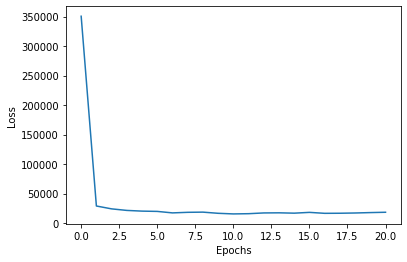

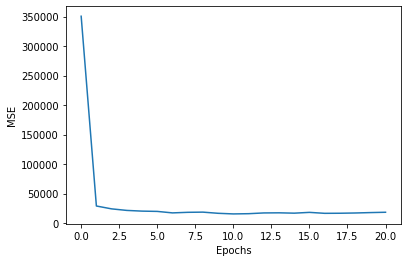

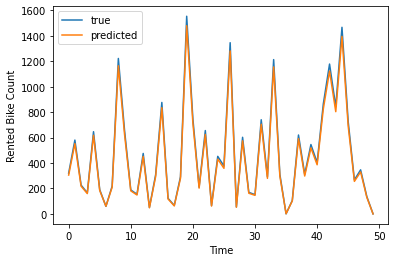

In [36]:
# ANN
batch_size 		= 24   # consider 32 training examples at each iteration
num_epochs 		= 500  # iterate 100 times over the entire training set

hidden_size = 6
output_size = 1

%run ./ANN.ipynb

(7008, 14)
(1752, 14)
(7008,)
(1752,)
Epoch 1/500
263/263 [==============================] - 4s 4ms/step - loss: 905990.8487 - mse: 905990.8482 - val_loss: 939745.8750 - val_mse: 939745.8750
Epoch 2/500
263/263 [==============================] - 1s 3ms/step - loss: 926179.6146 - mse: 926179.6146 - val_loss: 889164.8750 - val_mse: 889164.8750
Epoch 3/500
263/263 [==============================] - 1s 3ms/step - loss: 838731.9534 - mse: 838731.9534 - val_loss: 823442.3750 - val_mse: 823442.3750
Epoch 4/500
263/263 [==============================] - 1s 3ms/step - loss: 784896.5284 - mse: 784896.5284 - val_loss: 748470.3125 - val_mse: 748470.3125
Epoch 5/500
263/263 [==============================] - 1s 3ms/step - loss: 682970.6503 - mse: 682970.5698 - val_loss: 669742.3125 - val_mse: 669742.3125
Epoch 6/500
263/263 [==============================] - 1s 3ms/step - loss: 599910.7564 - mse: 599910.7564 - val_loss: 591737.8125 - val_mse: 591737.8125
Epoch 7/500
263/263 [=======================

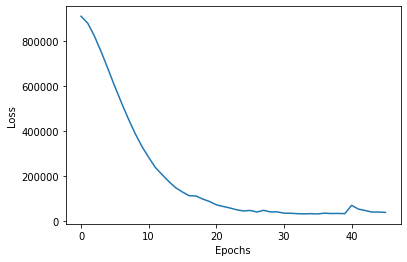

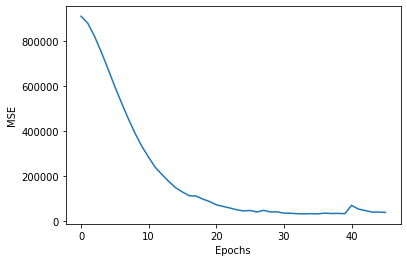

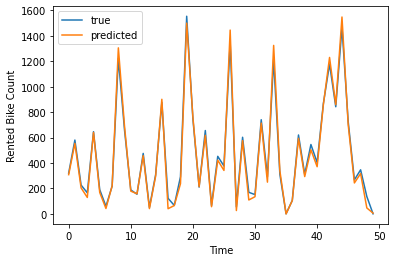

In [37]:
# LSTM
batch_size 		= 24   # consider 32 training examples at each iteration
num_epochs 		= 500  # iterate 100 times over the entire training set
drop_prob_1	    = 0.1 # dropout 
drop_prob_2     = 0.05

hidden_size = 6
output_size = 1

%run ./LSTM.ipynb

Epoch 1/500
263/263 [==============================] - 4s 4ms/step - loss: 937866.4905 - mse: 937866.4905 - val_loss: 931761.5000 - val_mse: 931761.5000
Epoch 2/500
263/263 [==============================] - 1s 3ms/step - loss: 904798.2199 - mse: 904798.2199 - val_loss: 884787.7500 - val_mse: 884787.7500
Epoch 3/500
263/263 [==============================] - 1s 3ms/step - loss: 819900.7019 - mse: 819900.7197 - val_loss: 816197.9375 - val_mse: 816197.9375
Epoch 4/500
263/263 [==============================] - 1s 3ms/step - loss: 782719.0732 - mse: 782719.0762 - val_loss: 738389.1250 - val_mse: 738389.1250
Epoch 5/500
263/263 [==============================] - 1s 3ms/step - loss: 700650.7398 - mse: 700650.7332 - val_loss: 657263.9375 - val_mse: 657263.9375
Epoch 6/500
263/263 [==============================] - 1s 3ms/step - loss: 590954.8039 - mse: 590954.8039 - val_loss: 576649.8125 - val_mse: 576649.8125
Epoch 7/500
263/263 [==============================] - 1s 3ms/step - loss: 511838.

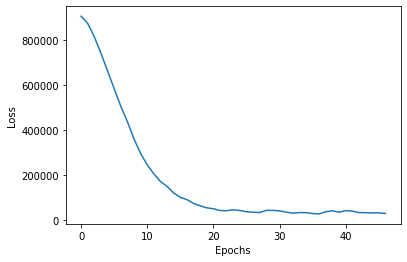

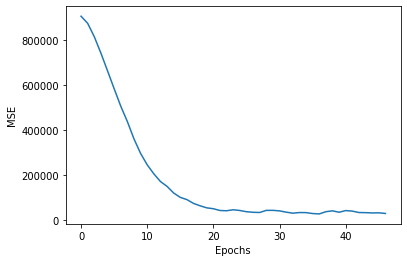

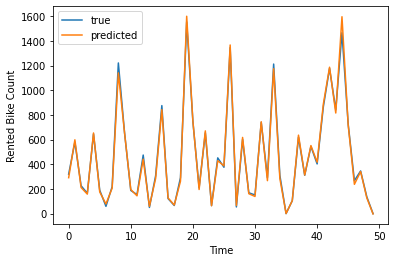

In [38]:
# GRU
batch_size 		= 24   # consider 32 training examples at each iteration
num_epochs 		= 500  # iterate 100 times over the entire training set
drop_prob_1	    = 0.1 # dropout 

hidden_size = 6
output_size = 1

%run ./GRU.ipynb

<ipython-input-39-852d49b16055>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_cnn['fill1'] = 0
<ipython-input-39-852d49b16055>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_cnn['fill1'] = 0


(7008, 15)
(7008, 5, 3)
(1752, 15)
(1752, 5, 3)
Epoch 1/500
263/263 [==============================] - 1s 2ms/step - loss: 817176.5902 - mse: 817176.5902 - val_loss: 145746.3281 - val_mse: 145746.3125
Epoch 2/500
263/263 [==============================] - 0s 2ms/step - loss: 76359.7158 - mse: 76359.7188 - val_loss: 2460.3374 - val_mse: 2460.3374
Epoch 3/500
263/263 [==============================] - 0s 2ms/step - loss: 43363.9751 - mse: 43363.9751 - val_loss: 2411.5928 - val_mse: 2411.5928
Epoch 4/500
263/263 [==============================] - 0s 2ms/step - loss: 43145.9851 - mse: 43145.9853 - val_loss: 2509.8989 - val_mse: 2509.8989
Epoch 5/500
263/263 [==============================] - 0s 2ms/step - loss: 37867.8445 - mse: 37867.8449 - val_loss: 2631.8171 - val_mse: 2631.8171
Epoch 6/500
263/263 [==============================] - 0s 2ms/step - loss: 52451.6066 - mse: 52451.6066 - val_loss: 2733.6519 - val_mse: 2733.6519
Epoch 7/500
263/263 [==============================] - 0s 2ms/st

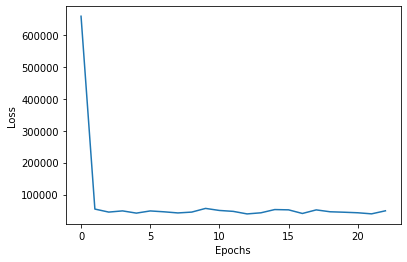

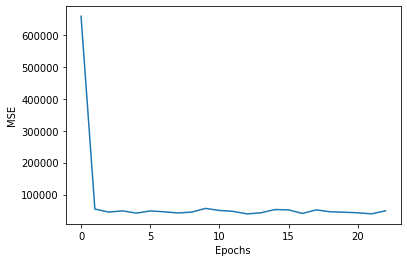

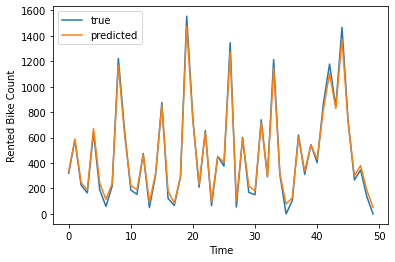

In [39]:
# CNN
batch_size 		= 24   # consider 32 training examples at each iteration
num_epochs 		= 500  # iterate 100 times over the entire training set
kernel_size 	= 2    # use 3x3 kernels throughout
pool_size 		= 2    # use 2x2 pooling throughout
conv_depth_1 	= 2   # 16 kernels in first conv.. layer
drop_prob_1 	= 0.05 # dropout after pooling with probability 0.25
drop_prob_2     = 0.1

hidden_size = 4
output_size = 1

%run ./CNN.ipynb

# Parameter Tweaking
# 1 hidden layer    0.9922 <---
# 2 hidden layers   0.9871
# 0 hidden layers   0.0389

# hidden_size = 6   0.9922
# hidden_size = 8   0.9907
# hidden_size = 4   0.9972 <---

# drop_prob_2 = 0.1 0.9855
# drop_prob_2 = 0.05 0.9887


# drop_prob_1 = 0.05 0.9887
# drop_prob_1 = 0.1 0.9781
# drop_prob_1 = 0.025 0.9974

<ipython-input-40-852d49b16055>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train_cnn['fill1'] = 0
<ipython-input-40-852d49b16055>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_cnn['fill1'] = 0


(7008, 15)
(7008, 5, 3)
(1752, 15)
(1752, 5, 3)
Epoch 1/500
263/263 [==============================] - 4s 5ms/step - loss: 911543.1802 - mse: 911543.1816 - mae: 703.7666 - val_loss: 934095.8750 - val_mse: 934095.8750 - val_mae: 705.9005
Epoch 2/500
263/263 [==============================] - 1s 3ms/step - loss: 887707.0180 - mse: 887707.0180 - mae: 690.7545 - val_loss: 892946.6875 - val_mse: 892946.6875 - val_mae: 678.6553
Epoch 3/500
263/263 [==============================] - 1s 3ms/step - loss: 817970.9844 - mse: 817970.9844 - mae: 650.2452 - val_loss: 840243.7500 - val_mse: 840243.7500 - val_mae: 643.5626
Epoch 4/500
263/263 [==============================] - 1s 3ms/step - loss: 774529.3781 - mse: 774529.3781 - mae: 622.5599 - val_loss: 779281.0000 - val_mse: 779281.0000 - val_mae: 599.9910
Epoch 5/500
263/263 [==============================] - 1s 3ms/step - loss: 728793.6158 - mse: 728793.6158 - mae: 580.6892 - val_loss: 713847.6250 - val_mse: 713847.6250 - val_mae: 556.0043
Epoch 6

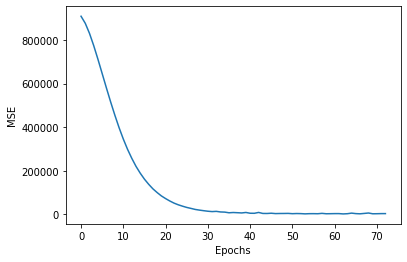

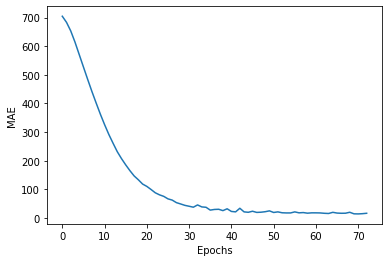

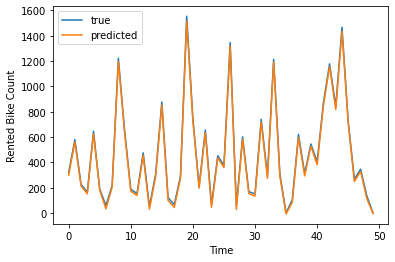

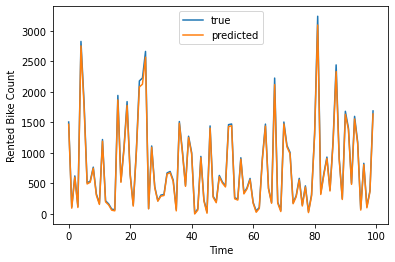

In [40]:
# LSTM-CNN
batch_size 		= 24   # consider 32 training examples at each iteration
num_epochs 		= 500    # iterate 100 times over the entire training set
kernel_size 	= 2    # use 3x3 kernels throughout
pool_size 		= 2    # use 2x2 pooling throughout
conv_depth_1 	= 4  # 16 kernels in first conv.. layer
drop_prob_1 	= 0.05 # dropout after pooling with probability 0.25
drop_prob_2     = 0.05

lstm_size = 8
hidden_size = 6
output_size = 1

%run ./CNN_LSTM.ipynb

# Parameter Tweaking
# conv_depth_2 = 6      0.9987 <---
# conv_depth_1 = 8      0.9972

# drop3                 0.9987 <---
# no drop3              0.9973

# drop_prob_2 = 0.1     0.9987
# drop_prob_2 = 0.05    0.9998 (0.9991) <---

# hidden_size = 6   0.9991 <---
# hidden_size = 8   0.9980
# hidden_size = 4   0.9960

# lstm_size = 12    0.9991 
# lstm_size = 6     0.9989
# lstm_size = 8     0.9995 <---

# batch_size = 24   0.9995
# batch_size = 12   0.9995

# kernel_size = 2   0.9995 <---
# kernel_size = 3   0.9994

# drop_prob_1 = 0.05 0.9995 <---
# drop_prob_1 = 0.025 0.9951
# drop_prob_1 = 0.1 0.9838

In [41]:
# SVM
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, max_error, mean_absolute_percentage_error
from sklearn import svm

rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(x_train, y_train)
y_pred = rbf.predict(x_test)

r2_value = r2_score(y_test, y_pred)
print("r2")
print(r2_value)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse")
print(rmse)

mae = mean_absolute_error(y_test, y_pred)
print("mae")
print(mae)

maximum_error = max_error(y_test, y_pred)
print("max error")
print(maximum_error)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("mean absolute percentage error")
print(mape)

r2
-1.1285104258964647
rmse
943.83777
mae
687.24603
max error
3309.0
mean absolute percentage error
0.9606164


In [42]:
# DT
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)

regr_1.fit(x_train, y_train)
regr_2.fit(x_train, y_train)

y_pred_1 = regr_1.predict(x_test)
y_pred_2 = regr_2.predict(x_test)

print(" - - - - - ")
print("depth 2")
print(" - - - - - ")
r2_value = r2_score(y_test, y_pred_1)
print("r2")
print(r2_value)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_1))
print("rmse")
print(rmse)

mae = mean_absolute_error(y_test, y_pred_1)
print("mae")
print(mae)

maximum_error = max_error(y_test, y_pred_1)
print("max error")
print(maximum_error)

mape = mean_absolute_percentage_error(y_test, y_pred_1)
print("mean absolute percentage error")
print(mape)

print(" - - - - - ")
print("depth 5")
print(" - - - - - ")
r2_value = r2_score(y_test, y_pred_2)
print("r2")
print(r2_value)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_2))
print("rmse")
print(rmse)

mae = mean_absolute_error(y_test, y_pred_2)
print("mae")
print(mae)

maximum_error = max_error(y_test, y_pred_2)
print("max error")
print(maximum_error)

mape = mean_absolute_percentage_error(y_test, y_pred_2)
print("mean absolute percentage error")
print(mape)

 - - - - - 
depth 2
 - - - - - 
r2
0.9224938489047805
rmse
180.1057293605454
mae
137.7562165516485
max error
1185.0587392550142
mean absolute percentage error
3.2911956355469644e+16
 - - - - - 
depth 5
 - - - - - 
r2
0.9986146128981777
rmse
24.079364067557012
mae
18.7285226554611
max error
154.78260869565202
mean absolute percentage error
1963492591685532.8


In [43]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

r2_value = r2_score(y_test, y_pred)
print("r2")
print(r2_value)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("rmse")
print(rmse)

mae = mean_absolute_error(y_test, y_pred)
print("mae")
print(mae)

maximum_error = max_error(y_test, y_pred)
print("max error")
print(maximum_error)

mape = mean_absolute_percentage_error(y_test, y_pred)
print("mean absolute percentage error")
print(mape)

r2
0.9999761105175065
rmse
3.1620069
mae
1.1067351
max error
64.0
mean absolute percentage error
0.0034616264
